In [53]:
# Importando as bibliotecas necessárias
import pandas as pd  # Para manipulação e análise de dados
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para visualização de dados
from sklearn.neighbors import KNeighborsClassifier  # Implementação do algoritmo KNN
from sklearn.preprocessing import StandardScaler  # Para padronização de features
from sklearn.model_selection import train_test_split  # Para dividir dados em conjuntos de treino e teste
from sklearn.metrics import confusion_matrix  # Para avaliar a performance do modelo
from sklearn.datasets import load_iris  # Dataset Iris para classificação

# Criando uma instância do StandardScaler para padronizar os dados
scale = StandardScaler()

In [54]:
# Carregando o dataset Iris
iris_dataset = load_iris()
# Criando um DataFrame pandas com os dados e nomes das features
iris = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
# Adicionando a coluna 'Species' ao DataFrame com os nomes das espécies
iris['Species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)
# Renomeando as colunas para melhor compreensão
iris.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [55]:
# Exibindo as primeiras linhas do DataFrame
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
# Verificando os tipos de dados de cada coluna
iris.dtypes

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
dtype: object

In [57]:
# Selecionando apenas as colunas de características (features)
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
# Padronizando as features (média 0, desvio padrão 1)
stand_features = pd.DataFrame(scale.fit_transform(X),
                              columns=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])
# Verificando a variância da coluna 'Petal.Length' para confirmar a padronização
np.var(stand_features['Petal.Length'])

np.float64(0.9999999999999998)

In [58]:
# Combinando as features padronizadas com a coluna de espécies
final_data = pd.concat([stand_features, iris['Species']], axis=1)
# Exibindo as primeiras linhas do DataFrame final
final_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


In [59]:
# Definindo X (features) e y (target) para o modelo
X = final_data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = final_data[['Species']]
# Dividindo os dados em conjuntos de treino (70%) e teste (30%)
# stratify=y garante que a proporção de classes seja preservada em ambos conjuntos
# random_state=0 para reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=0)

In [60]:
# Criando um vetor com valores de k (número de vizinhos) para testar
neighbors = np.arange(1, 10)
# Inicializando arrays vazios para armazenar as acurácias de treino e teste
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [61]:
# Testando diferentes valores de k e armazenando as acurácias
for i, k in enumerate(neighbors):
    # Criando um modelo KNN com k vizinhos
    knn = KNeighborsClassifier(n_neighbors=k)
    # Treinando o modelo com os dados de treino (convertendo y_train para array 1D)
    knn.fit(X_train, y_train.values.ravel())
    # Calculando a acurácia no conjunto de treino
    train_accuracy[i] = knn.score(X_train, y_train.values.ravel())
    # Calculando a acurácia no conjunto de teste
    test_accuracy[i] = knn.score(X_test, y_test.values.ravel())

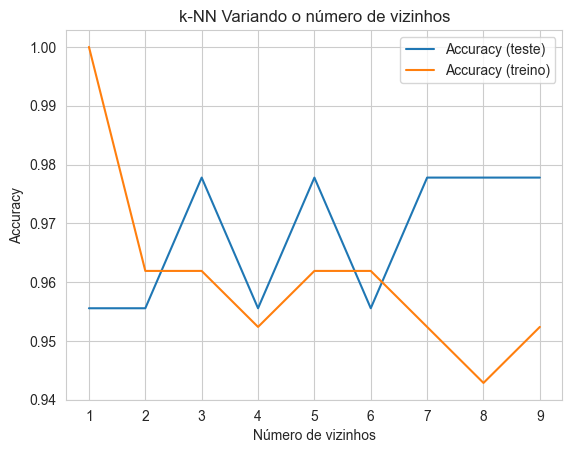

In [62]:
# Visualizando a acurácia em função do número de vizinhos
plt.title('k-NN Variando o número de vizinhos')
plt.plot(neighbors, test_accuracy, label='Accuracy (teste)')  # Linha para acurácia de teste
plt.plot(neighbors, train_accuracy, label='Accuracy (treino)')  # Linha para acurácia de treino
plt.legend()  # Adicionando legenda ao gráfico
plt.xlabel('Número de vizinhos')  # Rótulo do eixo x
plt.ylabel('Accuracy')  # Rótulo do eixo y
plt.show()  # Exibindo o gráfico

In [63]:
# Fazendo previsões com o último modelo treinado (k=9)
prediction = knn.predict(X_test)

# Gerando a matriz de confusão para avaliar o desempenho
confusion_matrix(y_test, prediction)

# Criando uma tabela cruzada mais detalhada da matriz de confusão
# rownames='True' indica as classes reais
# colnames='Predicted' indica as classes previstas
# margins=True adiciona totais de linha e coluna
pd.crosstab(y_test['Species'], prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,15,0,0,15
versicolor,0,15,0,15
virginica,0,1,14,15
All,15,16,14,45
